# Exercises - Explore

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.  

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.  



In [2]:
import os
import pandas as pd
import wrangle
import numpy as np
from datetime import timedelta, datetime
from env import username, host, password
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import prepare
import acquire

In [6]:
store_df = wrangle.acquire_store()
store_df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [7]:
store_df = prepare.prepare_store(store_df)
store_df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday,10.92
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Wednesday,9.24
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Thursday,11.76
2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Friday,10.92
2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Saturday,8.40


In [10]:
print('Date Range:', store_df.index.min(), 'to', store_df.index.max())
print('Shape:', store_df.shape)


Date Range: 2013-01-01 00:00:00 to 2017-12-31 00:00:00
Shape: (913000, 9)


In [16]:
train = store_df.loc['2013':'2015']
val = store_df.loc['2016']
test = store_df.loc['2017']
train.shape, val.shape, test.shape

((547500, 9), (183000, 9), (182500, 9))

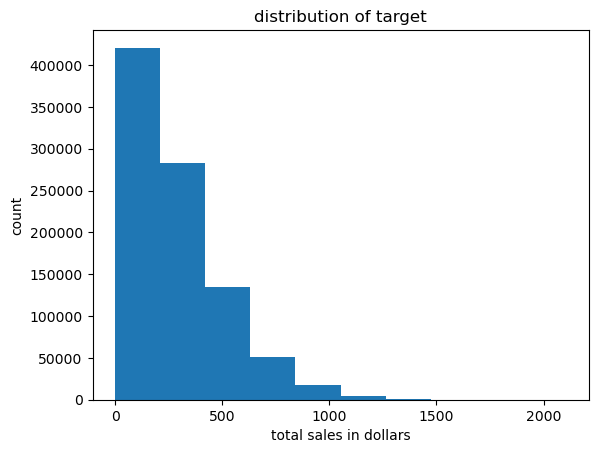

In [21]:
y = store_df['sales_total']
y.plot.hist()
plt.xlabel('total sales in dollars')
plt.ylabel('count')
plt.title('distribution of target')
plt.show()

***Takeaway***

- The distribution of sales_total is skewed to the left and not evenly distributed
- The majority of total sales is between 0-500 dollars.

<AxesSubplot:xlabel='month'>

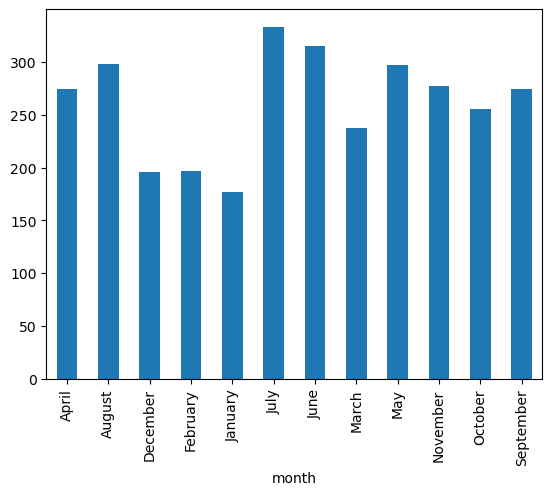

In [20]:
train.groupby('month')['sales_total'].mean().plot.bar()

***Takeaway***

- The most total sales occured in July
- The least total sales occured in January.
- It appears that the coldest months have the least amount of total sales and the warmer months have the most amount of total sales.

<AxesSubplot:xlabel='sale_date'>

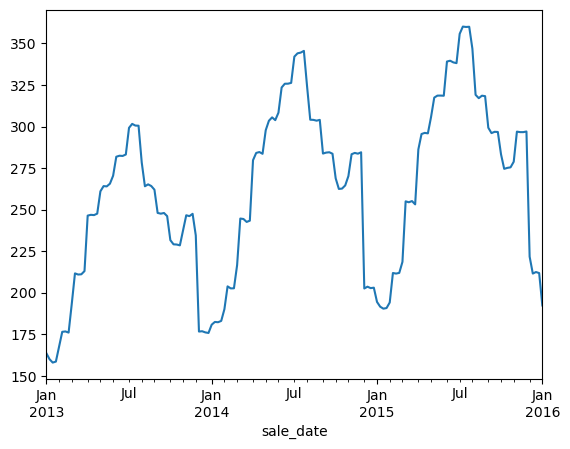

In [23]:
train['sales_total'].resample('W').mean().plot()

***Takeaway***

- Sales are increasing every year.
- At the beginning of every year there is a signficant drop in total sales.
- July is the peak of total sales each year.

<AxesSubplot:xlabel='sale_date'>

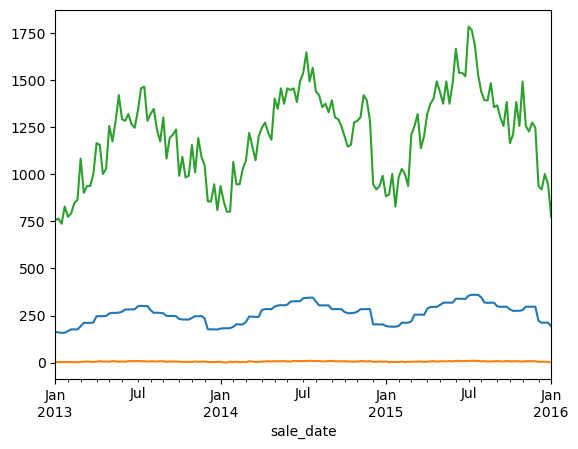

In [25]:
train['sales_total'].resample('W').mean().plot()
train['sales_total'].resample('W').min().plot()
train['sales_total'].resample('W').max().plot()

***Takeaways***

- The minimum sales remained extremely consistent throughout all months and years.
- The mean stayed at realtively the same for all three years.
- The maximum total sales increased slightly each year.

In [29]:
monthly_mean = train.resample('M').mean()
monthly_mean['shifted'] = monthly_mean['sales_total'].shift(-1)

monthly_mean

,sale_amount,item_price,store_zipcode,sales_total,shifted
sale_date,,,,,
2013-01-31,29.348645,5.1604,78224.8,157.894723,176.411855
2013-02-28,32.815500,5.1604,78224.8,176.411855,214.181650
2013-03-31,39.831097,5.1604,78224.8,214.181650,244.460082
2013-04-30,45.484933,5.1604,78224.8,244.460082,264.663123
2013-05-31,49.241419,5.1604,78224.8,264.663123,285.261279
2013-06-30,53.039800,5.1604,78224.8,285.261279,296.881241
2013-07-31,55.220774,5.1604,78224.8,296.881241,266.183375
2013-08-31,49.468452,5.1604,78224.8,266.183375,247.237694
2013-09-30,45.993800,5.1604,78224.8,247.237694,227.868064


Text(0, 0.5, 'total sales next month')

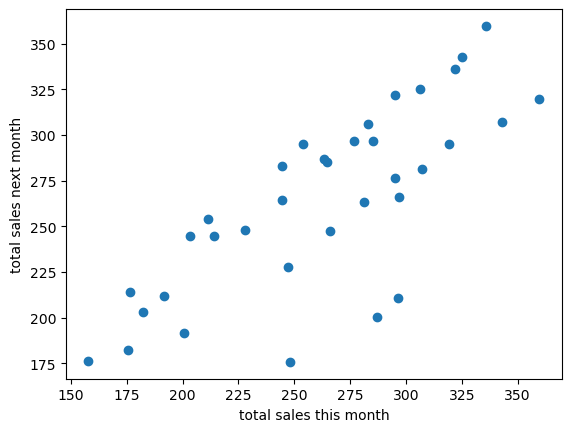

In [30]:
plt.scatter(monthly_mean['sales_total'], monthly_mean['shifted'])
plt.xlabel('total sales this month')
plt.ylabel('total sales next month')

***Takeaways***

- Total sales remain relatively the same from month to month, with maybe a 25 dollar diffrence between the two months.
- The month to month total sales drop and increase from month to month at a rate of about 25 dollars.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

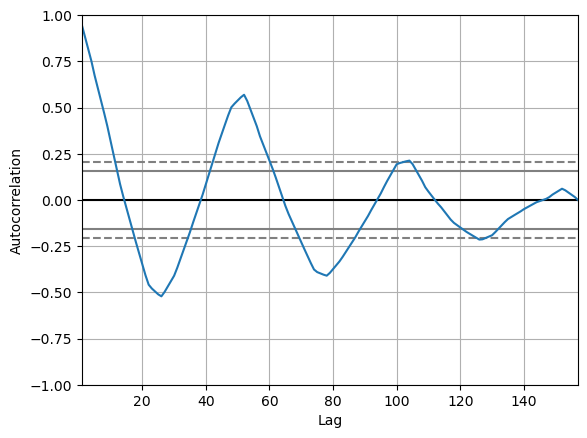

In [32]:
pd.plotting.autocorrelation_plot(train['sales_total'].resample('W').mean())

***Takeaways***

- Based on this autocorrelation plot, as time increases the average total sales remains steady. This provides further evidence that total sales might increase in certain months, but the growth rate of total sales is not increasing.

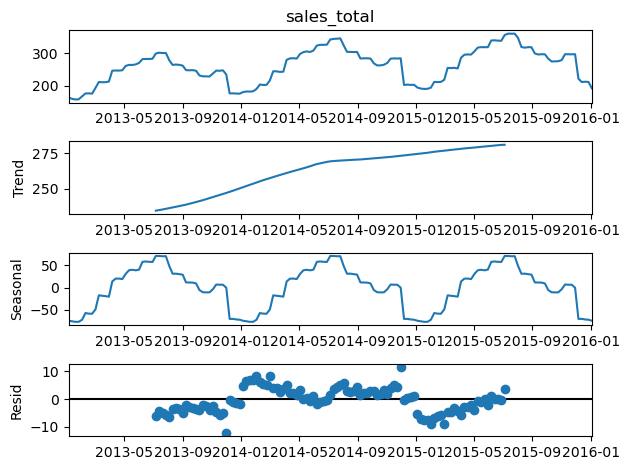

In [33]:
result = sm.tsa.seasonal_decompose(train['sales_total'].resample('W').mean())

result.plot()
None

***Takeaways***

- There appears to be a significant increase in total sales from 2013 to 2014.
- The trend of total sales increased significantly from 2013 to 2014, but appears to be leveling out from 2015-2016.
- The seasonal total sales remains identitcal and is not increasing or decreasing.
- The residual total sales was below the mean in 2013, above the mean in 2014, and dropped off below the mean in 2015, and trending back to above the mean in 2016.
- These visualizations show that each year there is a decrease, followed by an increase, followed by another decrease.

In [8]:
power_df = acquire.acquire_open_power()
power_df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [9]:
power_df = prepare.prepare_power(power_df)
power_df

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,January,2006
2006-01-02,1380.52100,0.000,0.000,0.000,January,2006
2006-01-03,1442.53300,0.000,0.000,0.000,January,2006
2006-01-04,1457.21700,0.000,0.000,0.000,January,2006
2006-01-05,1477.13100,0.000,0.000,0.000,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017


In [34]:
print('Date Range:', power_df.index.min(), 'to', power_df.index.max())
print('Shape:', power_df.shape)

Date Range: 2006-01-01 00:00:00 to 2017-12-31 00:00:00
Shape: (4383, 6)


In [35]:
train_len = int(0.6 * len(power_df))
val_test_split = int(0.8 * len(power_df))
train_len, val_test_split

(2629, 3506)

In [36]:
train = power_df.iloc[:train_len]
val = power_df.iloc[train_len:val_test_split]
test = power_df.iloc[val_test_split:]
train.shape, val.shape, test.shape

((2629, 6), (877, 6), (877, 6))

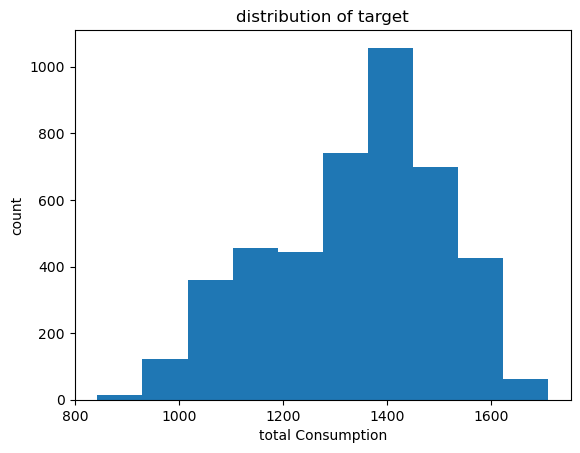

In [37]:
y = power_df['Consumption']
y.plot.hist()
plt.xlabel('total Consumption')
plt.ylabel('count')
plt.title('distribution of target')
plt.show()

***Takeaways***

- The distribution of consumption is relatively normally distributed.
- The larges spike in consumption appears around 1400.
- The lowest levels of consumption occur at the lower and higher levels.

<AxesSubplot:xlabel='month'>

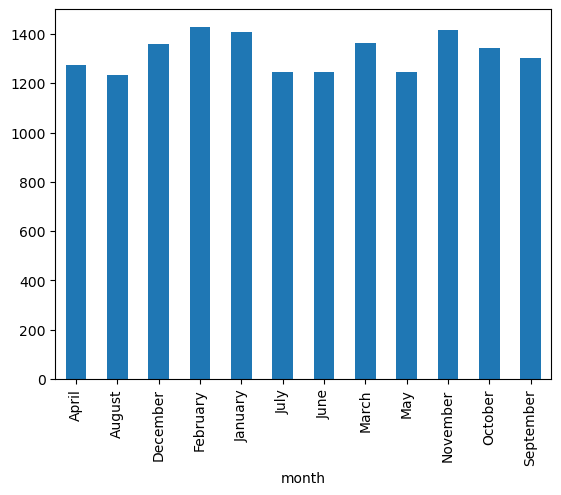

In [38]:
train.groupby('month')['Consumption'].mean().plot.bar()

***Takeaways**

- Consumption is relatively evenly distributed between most of the months.
- The greates level of consumption ocurs in February and November, with the coldest months having the highest levels of consumption and warmer months having the lower levels of consumption.

<AxesSubplot:xlabel='Date'>

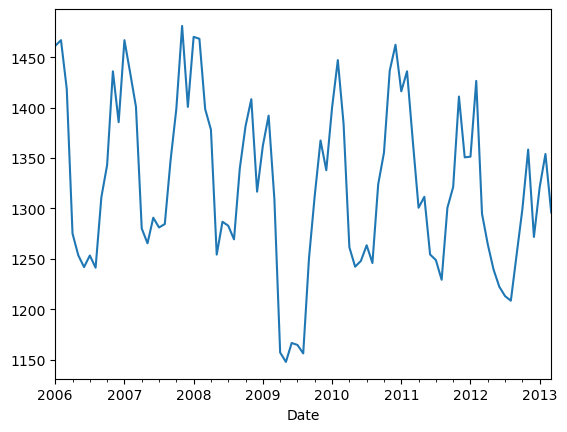

In [42]:
train['Consumption'].resample('M').mean().plot()

***Takeaways***

- The rise and fall in consumption remained relatively consistent from year to year, with a significant drop in consumption between 2009-2010.

<AxesSubplot:xlabel='Date'>

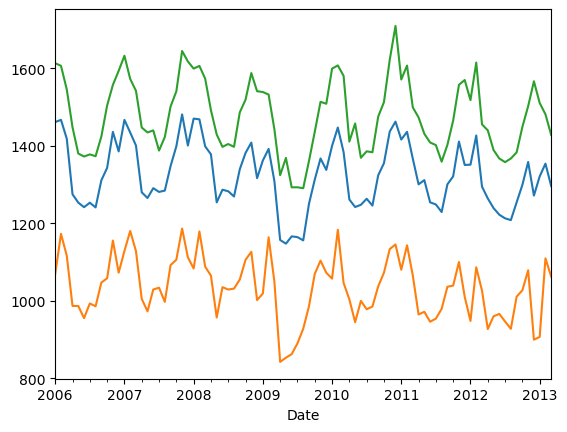

In [43]:
train['Consumption'].resample('M').mean().plot()
train['Consumption'].resample('M').min().plot()
train['Consumption'].resample('M').max().plot()

***Takeaways***

- The maximum and mean levels of consumption almsot mirror eachother and are consistent from year to year.
- The minimum levels of consumption are also consistent, but much lower than the mean, compared to the maximum.
- There is a verification in the significant drop in consumption occuring in 2009.

In [44]:
monthly_mean2 = train.resample('M').mean()
monthly_mean2['shifted'] = monthly_mean2['Consumption'].shift(-1)

monthly_mean2

,Consumption,Wind,Solar,Wind+Solar,year,shifted
Date,,,,,,
2006-01-31,1461.442065,0.000000,0.000000,0.000000,2006.0,1467.106893
2006-02-28,1467.106893,0.000000,0.000000,0.000000,2006.0,1418.649161
2006-03-31,1418.649161,0.000000,0.000000,0.000000,2006.0,1275.058900
2006-04-30,1275.058900,0.000000,0.000000,0.000000,2006.0,1253.488484
2006-05-31,1253.488484,0.000000,0.000000,0.000000,2006.0,1241.781667
...,...,...,...,...,...,...
2012-11-30,1358.505700,129.574833,26.773533,156.348367,2012.0,1271.769968
2012-12-31,1271.769968,180.488419,14.025000,194.513419,2012.0,1321.194935
2013-01-31,1321.194935,161.874935,11.199290,173.074226,2013.0,1354.087429


Text(0, 0.5, 'total consumption next month')

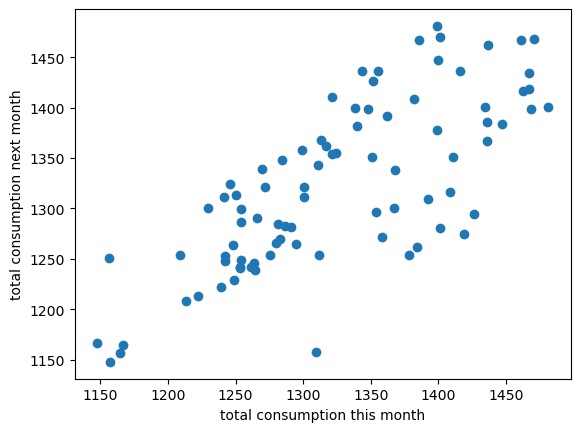

In [45]:
plt.scatter(monthly_mean2['Consumption'], monthly_mean2['shifted'])
plt.xlabel('total consumption this month')
plt.ylabel('total consumption next month')

***Takeaways***

- At the lower level of consumption, the month to month consumption rate is more likely to remain the same.
- As consumption increases the month to month consumption rate tends to be more inconsistent.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

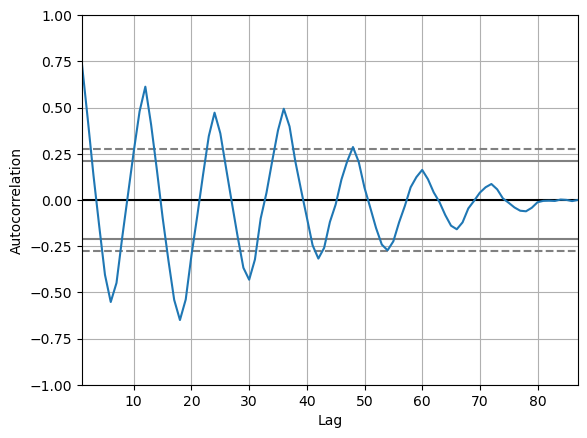

In [46]:
pd.plotting.autocorrelation_plot(train['Consumption'].resample('M').mean())

***Takeaways***

- As indicated by the autocorrelation visualization, the rate of consumption remains relatively the same over time.

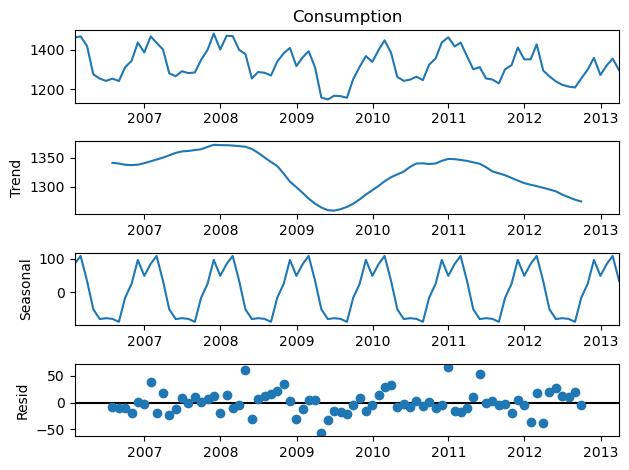

In [47]:
result = sm.tsa.seasonal_decompose(train['Consumption'].resample('M').mean())

result.plot()
None

***Takeaways***

- The rate of consumption appears to remain consistent from year to year with the exception of 2009.
- The trend of consumption started off high in 2007-2008, with a significant drop off in 2009 and levels out from 2010-2012 with a slow decline starting near the end of 2012.
- Both the seasonal and residual visualizations show that consumption remains fairly consistent with the exception of a drop off in 2009.